In [40]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
master_df = pd.read_csv('ieso_ga_master_dataset_allWeather_updated2020.csv')
forecasts = pd.read_csv('ga_forecasts_top_12.csv')

In [42]:
master_df.rename(columns={'timestamp_eastern': 'ts'}, inplace=True)
master_df.head()

,adjusted_demand_MW,demand_MW,hour_ending_eastern,season,ts,timestamp_utc,altitude_Toronto,apparentTemperature_Toronto,azimuth_Toronto,cloudCover_Toronto,...,precipType_Milton,pressure_Milton,summary_Milton,temperature_Milton,uvIndex_Milton,visibility_Milton,windBearing_Milton,windGust_Milton,windSpeed_Milton,population_Milton
0,11972.0,12103.0,1,2013-2014,2013-05-01 01:00:00,2013-05-01 06:00:00,0.0,13.15,0.0,0.98,...,NaN,1022.1,Mostly Cloudy,12.47,0.0,16.093,165.0,2.60,1.65,101715.0
1,11654.0,11814.0,2,2013-2014,2013-05-01 02:00:00,2013-05-01 07:00:00,0.0,14.02,0.0,0.98,...,NaN,1022.5,Mostly Cloudy,12.36,0.0,16.093,160.0,1.86,1.56,101715.0
2,11492.0,11662.0,3,2013-2014,2013-05-01 03:00:00,2013-05-01 08:00:00,0.0,12.99,0.0,0.98,...,NaN,1022.9,Mostly Cloudy,11.72,0.0,16.093,161.0,2.07,1.57,101715.0
3,11518.0,11675.0,4,2013-2014,2013-05-01 04:00:00,2013-05-01 09:00:00,0.0,13.41,0.0,0.97,...,NaN,1023.3,Mostly Cloudy,11.05,0.0,16.093,140.0,1.57,1.35,101715.0
4,12066.0,12298.0,5,2013-2014,2013-05-01 05:00:00,2013-05-01 10:00:00,0.0,12.70,0.0,0.98,...,NaN,1024.2,Overcast,11.03,0.0,16.093,127.0,1.92,1.19,101715.0


In [43]:
forecasts.head(24)

,forecast,ts,ts_future,horizon_hr
0,0.0000,2016-05-08 01:00:00,2016-05-08 02:00:00,1.0
1,0.0000,2016-05-08 01:00:00,2016-05-08 03:00:00,2.0
2,0.0000,2016-05-08 01:00:00,2016-05-08 04:00:00,3.0
3,0.0000,2016-05-08 01:00:00,2016-05-08 05:00:00,4.0
4,0.0000,2016-05-08 01:00:00,2016-05-08 06:00:00,5.0
5,0.0000,2016-05-08 01:00:00,2016-05-08 07:00:00,6.0
6,0.0000,2016-05-08 01:00:00,2016-05-08 08:00:00,7.0
7,0.0575,2016-05-08 01:00:00,2016-05-08 09:00:00,8.0
8,0.0200,2016-05-08 01:00:00,2016-05-08 10:00:00,9.0
9,0.0000,2016-05-08 01:00:00,2016-05-08 11:00:00,10.0


2013-2014


Text(0.5, 1.0, 'Adjusted demand (MW) in season 2013-2014')

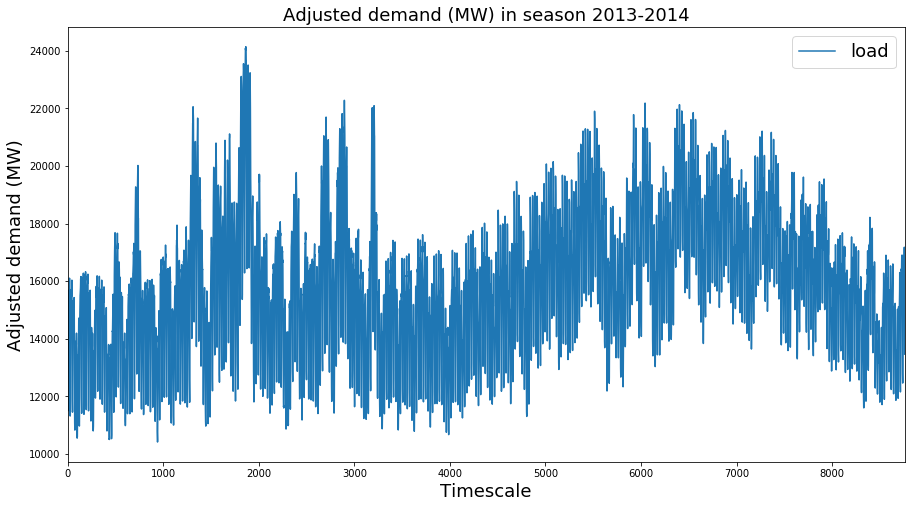

In [44]:
seasons = list(master_df.season.values)
print(seasons[0])
mask = master_df.season==seasons[0]
ax = master_df[mask].adjusted_demand_MW.plot(figsize=(15,8), label = 'load')
ax.set_xlabel("Timescale", fontsize=18)
ax.set_ylabel("Adjusted demand (MW)" , fontsize=18)
plt.legend(fontsize=18)
plt.title("Adjusted demand (MW) in season " + str(seasons[0]), fontsize=18)

In [45]:
# Look at the forecasts at 10:00 am on each day
forecasts['ts'] = pd.to_datetime(forecasts['ts'])
forecasts['ts_future'] = pd.to_datetime(forecasts['ts_future'])
mask = forecasts.ts.dt.time == datetime.time(10, 0)
forecasts_10am = forecasts[mask]
forecasts_10am.head(24)

,forecast,ts,ts_future,horizon_hr
216,0.0025,2016-05-08 10:00:00,2016-05-08 11:00:00,1.0
217,0.0000,2016-05-08 10:00:00,2016-05-08 12:00:00,2.0
218,0.0050,2016-05-08 10:00:00,2016-05-08 13:00:00,3.0
219,0.0000,2016-05-08 10:00:00,2016-05-08 14:00:00,4.0
220,0.0000,2016-05-08 10:00:00,2016-05-08 15:00:00,5.0
221,0.0025,2016-05-08 10:00:00,2016-05-08 16:00:00,6.0
222,0.0200,2016-05-08 10:00:00,2016-05-08 17:00:00,7.0
223,0.0250,2016-05-08 10:00:00,2016-05-08 18:00:00,8.0
224,0.1075,2016-05-08 10:00:00,2016-05-08 19:00:00,9.0
225,0.4575,2016-05-08 10:00:00,2016-05-08 20:00:00,10.0


In [46]:
# mask = forecasts_10am.ts.dt.year == 2016
# data =  forecasts_10am[mask]
# data
# data.forecast.plot(x=data.ts_future, figsize=(15,8), c='r', label='forecast')